<a href="https://colab.research.google.com/github/Kandeo/Week-7-Project/blob/main/Christine_Kandeo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. 


The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.


**Dataset**

The main dataset contains demographic information and what financial services are used by individuals across East Africa. 

This data was extracted from various Finscope surveys ranging from 2016 to 2018.

Dataset Files:

1. Variable Definitions: http://bit.ly/VariableDefinitions 
2. Dataset: http://bit.ly/FinancialDataset  



# **Defining The Question**

**Specific Data Analytics Question**

Which individuals are most likely to have or use a bank account.


**Metric For Success**

Being that access to bank accounts is a major indicator of financial inclusion, our Analysis should be able to:

- design a model that can accurately predict individuals likely to have or use a bank account.

- Key demographic factors that might drive an individuals’ financial outcomes.




**Research Context**

Across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services.

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services.

Therefore, access to bank accounts is an essential contributor to long-term economic growth.


**Experimental Design**

Multiple Regression and Reduction Technique shall be used to make predictions.

**Data Relevance**

The data was extracted from various Finscope surveys ranging from 2016 to 2018 across the Kenya, Uganda, Rwanda and Tanzania

# **Data Loading**

In [135]:
#Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

#Reading and Previewing Our Dataset:
df = pd.read_csv("http://bit.ly/FinancialDataset")
df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


Checking the Data

In [136]:
#Checking the Shape of the Dataset:
df.shape

#Finding the Number Of Records Per Column :
#df.count()

(23524, 13)

The dataset has 23,524 Rows and 13 Columns

In [137]:
#Viewing the Datatypes in our columns:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

**External Source Data Validation**

More information about the surveys can be reviewed from the following reports:

1. FinAccess Kenya 2018; https://fsdkenya.org/publication/finaccess2019/    

2. Finscope Rwanda 2016; http://www.statistics.gov.rw/publication/finscope-rwanda-2016
3. Finscope Tanzania 2017; http://www.fsdt.or.tz/finscope/ 
4. Finscope Uganda 2018; http://fsduganda.or.ug/finscope-2018-survey-report/

# **Data Cleaning**

Irrelevant Observations

In [138]:
#Dropping the Year and UniqueID column as they wont affect our analysis:
df.drop(df.columns[[1]], axis=1, inplace = True)
df.head()

,country,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Missing and Duplicate Values

In [139]:
#Identifying Missing Values:
df.isnull().sum()

country                   14
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

This displays the number of missing values in each column. 

In [140]:
#Renaming the relevant columns for ease of analysis:
df1 = df.rename(columns = {'Respondent Age': 'Age', 'Has a Bank account': 'Bank_Access', 'Cell Phone Access':'Phone_Access', 'Type of Location':'Location', 'Level of Educuation':'Education', 'Type of Job':'Occupation', 'gender_of_respondent':'Sex', 'household_size':'HH_Size'}, inplace = True)

In [141]:
#Dropping the Observations with missing data:
df1=df.dropna()
df1.isnull().sum()

country                   0
uniqueid                  0
Bank_Access               0
Location                  0
Phone_Access              0
HH_Size                   0
Age                       0
Sex                       0
The relathip with head    0
marital_status            0
Education                 0
Occupation                0
dtype: int64

In [142]:
#Checking and Dropping any Duplicates:
df1.duplicated().sum()
#The data has 4,371 Duplicates. Dropping them for better analysis:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

For Eligibility purpose, observations of respondents below the Age of 18 are dropped.

Adult Population is considered to be 18 years and above

In [143]:
#Dropping observations of those below the age of 18:
Nonadults = df1[ df1['Age'] < 18 ].index
df1.drop(Nonadults , inplace=True)

Household size of 0 is removed for data accuracy

In [144]:
HSize = df1[ df1['HH_Size'] == 0 ].index
df1.drop(HSize , inplace=True)

Outliers and Anomalies

Text(0, 0.5, 'Data')

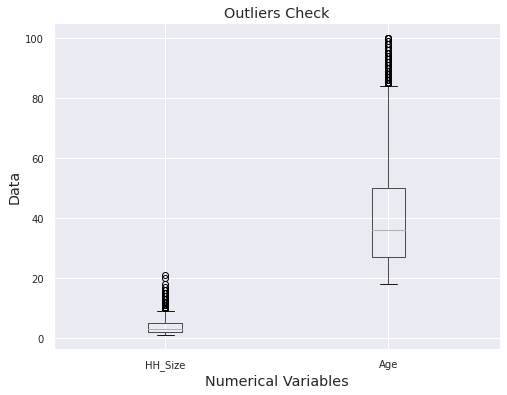

In [145]:
#Checking for Outliers in our dataset:

df1.boxplot(column=['HH_Size', 'Age'], figsize=(8, 6), fontsize=10, grid=True)
plt.title('Outliers Check')
plt.xlabel('Numerical Variables')
plt.ylabel('Data')

Both our numerical variables contain Outliers as plots can be observed outside the upper quantile. 

Removing Outliers

In [146]:
#Finding  Q1 and Q3:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
Q1, Q3

#Finding Interquartile
IQR = Q3 - Q1
IQR

#Finding the Lower and Upper Limits:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

#Returning a boolean array of the rows with (any) non-outlier column values:
df2 =df1[~((df1<lower_limit) | (df1>upper_limit)).any(axis=1)]


Exporting the Dataset

In [69]:
#To export our cleaned dataset:
df2.to_csv('FinancialInclusion.csv')

# **Exploratory Data Analysis**

**Univariate Analysis**

From this analysis we seek to understand:
- Key Demographic Factors
 

1. Gender

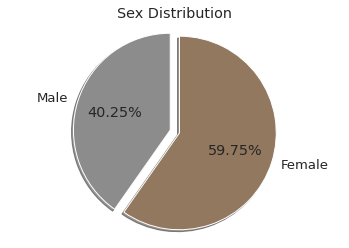

In [147]:
#Categorising our data based on Sex:
df2['Sex'].value_counts()
# Female: 10,587      Male: 7,133

#Visualising the information on a pie chart:
labels= ['Male','Female']
colors=['C7', 'C5']
sizes= [7133, 10587]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.title('Sex Distribution')
plt.axis('equal')
plt.show()



Of the Data provided, 59.75% were Female while 40.25% were male.

2. Marital Status

In [148]:
#To view the dataset by Marital status:
df2['marital_status'].value_counts(normalize=True)*100

Married/Living together    47.736852
Single/Never Married       32.435404
Widowed                    11.531061
Divorced/Seperated          8.260033
Dont know                   0.036650
Name: marital_status, dtype: float64

Most people were either Married/Living together or Single/Never married.

3. Geographical Area

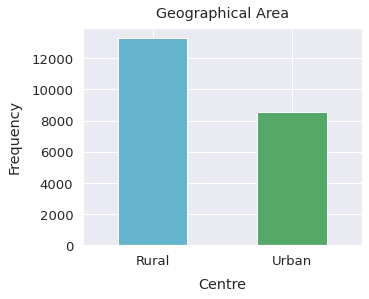

In [149]:
#Viewing the Data in terms of Location:
df2['Location'].value_counts() 
#Rural: 10,875   Urban: 6,845    

#Visualizing the Information on a pie chart:
sns.set(font_scale=1.2)
df2['Location'].value_counts().plot(kind='bar', figsize=(5, 4), rot=0, color= ('C9','C2'))
plt.xlabel("Centre", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.title("Geographical Area", y=1.02);


Majority lived in the Rural Area.

4. Age Distribution

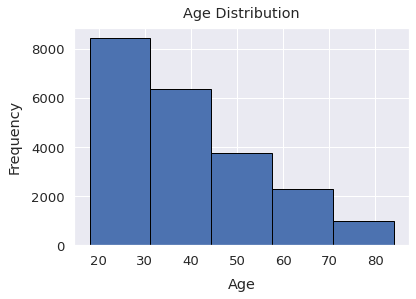

In [150]:
#To find out the popular age group of our adult population:
Age_Dist = df2['Age']
bins = 5
plt.hist(Age_Dist, bins=bins, edgecolor='black')
plt.xlabel("Age", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.title("Age Distribution", y=1.02);


Most respondents were around 20-40 Years of age

5. Education

In [151]:
#To view the educational Attainment:
df2['Education'].value_counts()

Primary education                  12006
No formal education                 4209
Secondary education                 3677
Tertiary education                  1127
Vocational/Specialised training      778
6                                     25
Other/Dont know/RTA                    6
Name: Education, dtype: int64

The highest level of attainment was Primary Education.

6. Bank Account ownership

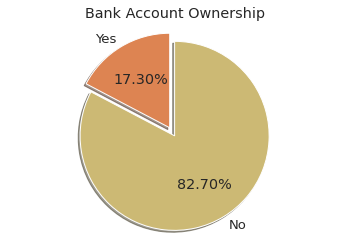

In [152]:
#Viewing our data in terms of Bank Ownership;
df2['Bank_Access'].value_counts() 
#Yes: 3,065   No: 14,655

labels= ['Yes','No']
colors=['C1', 'C8']
sizes= [3065, 14655]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.title('Bank Account Ownership')
plt.axis('equal')
plt.show()





17.30% of Our Sample had Bank accounts

7. Mobile Phone Accessibility

In [153]:
#Viewing our adult population in terms of those with access to a mobile phone device:
df2['Phone_Access'].value_counts(normalize=True)*100

Yes    75.82921
No     24.17079
Name: Phone_Access, dtype: float64

76% of the total sample had access to mobile phones

8. Occupation

In [154]:
#To view the type of jobs most individuals engaged in:
df2['Occupation'].value_counts()

Self employed                   6125
Informally employed             5335
Farming and Fishing             5192
Remittance Dependent            1997
Formally employed Private       1023
Other Income                     980
No Income                        473
Formally employed Government     380
Government Dependent             207
Dont Know/Refuse to answer       116
Name: Occupation, dtype: int64

Majority of the individuals were either self employed  or informally employed

In [155]:
#A descriptive summary of  our Numerical variables:
df2.describe()

,HH_Size,Age
count,21828.000000,21828.000000
mean,3.550898,39.270616
std,2.066012,15.521400
min,1.000000,18.000000
25%,2.000000,27.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,9.000000,84.000000


In [156]:
#Finding the Mode to compare for skewness:
df2['Age'].mode()
#From the observation, the mean and median are greater than the mode, hence our variable is positively skewed. 

0    30.0
dtype: float64

**Conclusions and Recommendations**

From this analysis;
- Majority of our population was based in the rural areas.
- The average age of our Adult population was 35 Years.
- Average Household size is 3.
- Most of this individuals had access to mobile phones.
- Majority did not own Bank accounts.
- The highest level of education was Primary Education.

With all this factors at play:
- Further analysis of the data is recommended to test for any relatiosnhip between this demographic factors. 

- Of note is also the type of job most of the individuals engaged in. Collecting more information on those formally employed can help provide better insights on financial inclusivity.
- Looking at the location concetration of our population can also help us understand reasons why most do no have bank accounts.
- Most individuals have access to Mobile phones. Alternative ways of accessing banking services on the population that has bank accounts can be utilised.


**Bivariate Analysis**

This analysis shall help assess any relationship between the variables in our previous analysis.

- Numerical variables

In [80]:
#Starting with our numerical variables, to understand if there is any relationship between the Ages and Household size:
df2['Age'].corr(df2['HH_Size'])

-0.09085580554847923

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


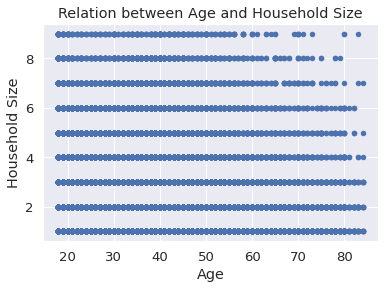

In [157]:
#Visualizing this relation in a scatter plot:
df2.plot(x = 'Age', y = 'HH_Size', kind='scatter')
plt.title('Relation between Age and Household Size')
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.show()

No relationship exists between ones Age and their Household Size.

- Categorical Variables

1. Bank account ownership and Geographical location

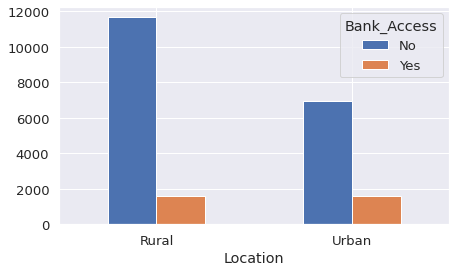

In [82]:
#To understand the relationship between ownership and Location:
C=pd.crosstab(index=df2['Location'],columns=df2['Bank_Access'])
C.plot.bar(figsize=(7,4), rot=0)


Majority of the individuals in this centres lacked bank accounts

2. Mobile Phone accessibility and Location

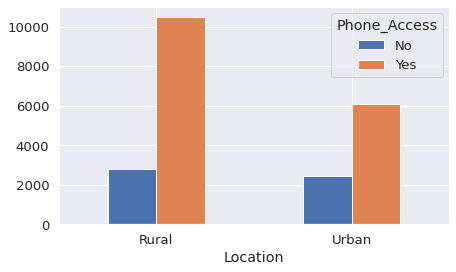

In [83]:
#To view mobile Phone Accesibility by location:
C=pd.crosstab(index=df2['Location'],columns=df2['Phone_Access'])
C.plot.bar(figsize=(7,4), rot=0)

Most Individuals had access to mobile phones.

3. Level of Education and Account ownership

In [84]:
#To view bank account ownership by level of education:
pd.crosstab(index=df2['Education'],columns=df2['Bank_Access'])

Bank_Access,No,Yes
Education,,
6,20,5
No formal education,4048,161
Other/Dont know/RTA,0,6
Primary education,10946,1060
Secondary education,2718,959
Tertiary education,543,584
Vocational/Specialised training,329,449


Most individuals who owned bank accounts had reached Primary Education

4. Bank account ownership and Mobile phone accessibility

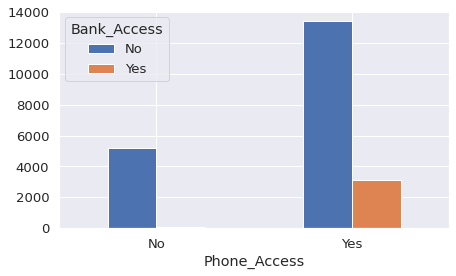

In [85]:
#Understanding Account ownership and Mobile phone accessibility:
C=pd.crosstab(index=df2['Phone_Access'],columns=df2['Bank_Access'])
C.plot.bar(figsize=(7,4), rot=0)

Majority of the individuals who had Access to Phones also had Bank accounts

5. Bank account ownership By Age Group

In [86]:
#To find ownership of bank account by the different ages:
df2['Age_bins'] = pd.cut(x=df2['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

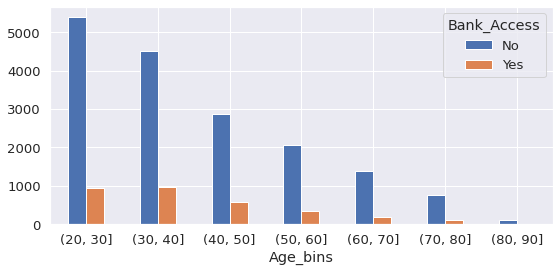

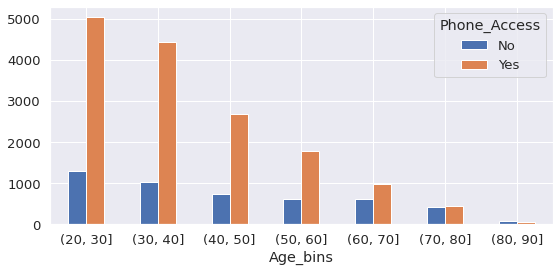

In [87]:
#Comparing Mobile phone and Bank account across age groups:
C=pd.crosstab(index=df2['Age_bins'],columns=df2['Bank_Access'])
C.plot.bar(figsize=(9,4), rot=0)
C=pd.crosstab(index=df2['Age_bins'],columns=df2['Phone_Access'])
C.plot.bar(figsize=(9,4), rot=0)

Phone accessibility is high among the 20-30 years. The same group leads in lack of bank account ownership.

6. Bank Account ownership by Occupation

In [88]:
#To view bank account ownership by type of job:
pd.crosstab(index=df2['Occupation'],columns=df2['Bank_Access'])

Bank_Access,No,Yes
Occupation,,
Dont Know/Refuse to answer,102,14
Farming and Fishing,4573,619
Formally employed Government,83,297
Formally employed Private,460,563
Government Dependent,166,41
Informally employed,4899,436
No Income,462,11
Other Income,797,183
Remittance Dependent,1772,225


Self Employed persons reported high numbers of bank account ownership.The same persons also had high numbers of those who lacked bank accounts.
 

**Conclusions and Recommendations**

From Bivariate analysis;
- Majority of the individuals in both locations lacked bank accounts.
- Individuals who had access to phones also had bank accounts.
- No relationship was observed between Age and Household sizes.
- Most individuals who accessed phones and lacked bank accounts were around the ages of 20-30 Years.

From this analysis, it is quite evident that almost all the demographical factors captured in our dataset contribute to the bank account ownership status of an individual.

Therefore, when predicting Individuals who are likely to use/own bank accounts, one should consider things like :Type of Job, Location, Age, Phone Accessibility and Level of education.

**Multivariate Analysis**

In this Analysis, we seek to Predict which individuals are likely to have/use bank account

In [130]:
#Importing Libraries:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



**Train and Test Data**

In [131]:
#Creating Our dataframe:
df3 = df2[['uniqueid','country','Bank_Access', 'Location', 'Phone_Access','Age', 'Sex', 'Education','Occupation']].copy()
df3.head()

,uniqueid,country,Bank_Access,Location,Phone_Access,Age,Sex,Education,Occupation
0,uniqueid_1,Kenya,Yes,Rural,Yes,24.0,Female,Secondary education,Self employed
1,uniqueid_2,Kenya,No,Rural,No,70.0,Female,No formal education,Government Dependent
2,uniqueid_3,Kenya,Yes,Urban,Yes,26.0,Male,Vocational/Specialised training,Self employed
3,uniqueid_4,Kenya,No,Rural,Yes,34.0,Female,Primary education,Formally employed Private
4,uniqueid_5,Kenya,No,Urban,No,26.0,Male,Primary education,Informally employed


In [132]:
#Creating Dummies for our Variables:
df4 = pd.get_dummies(df3, drop_first=True)

#Dividing our dataset into features:
X=df4.drop('Bank_Access_Yes', axis=1)
Y=df4['Bank_Access_Yes']

#Dividing data into training and test sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#Performing feature scaling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Performing logistic regression analysis:
logmodel=LogisticRegression()
logmodel.fit(X_train, Y_train)

#Evaluating Performance:
predictions=logmodel.predict(X_test)

Data Accuracy

In [134]:
#To check for accuracy in our dataset:
classification_report(Y_test,predictions)
confusion_matrix(Y_test, predictions)
accuracy_score(Y_test,predictions)*100

81.539166284929